# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "sabrina"
filename = monster + "_20200424.csv"
multipliers = [1.2 * 3, 4.0, 3.0] # ATK
BASE_STATS = {
    'HP': 9060,
    'ATTACK': 780,
    'DEFENSE': 593,
    'SPEED': 101,
    'CRIT_RATE': .15,
    'CRIT_DMG': .5,
    'ACCURACY%': 0,
    'RESISTANCE%': 15,
}

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
df_full = pd.read_csv(filename, index_col="ID")
print(df.columns)
runes_cols = ["Rune #" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Avg Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Resistance',
       'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'Rune #1', 'Rune #2', 'Rune #3', 'Rune #4', 'Rune #5',
       'Rune #6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,...,Skilled Up,Acquired,Locked,Transmogrified,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6
ID,,,,,,,,,,,,,,,,,,,,,
11944683468,40,6,21973,1962,1240,226,15,7,54,130,...,No,2018-07-27 13:25:57,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,ATK%
11227417677,40,6,21172,2399,1240,164,34,25,70,147,...,Yes,2018-03-20 02:00:35,No,Yes,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
12611543125,40,6,25642,2243,1145,176,15,12,82,186,...,Yes,2018-11-25 08:33:14,No,Yes,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
6525294675,40,6,19209,2169,1048,224,23,15,86,166,...,Yes,2018-09-28 02:25:53,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,ATK%
11960410838,40,6,18122,2461,1210,190,15,20,80,158,...,Yes,2018-07-30 05:20:10,No,Yes,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13836956229,35,5,10009,1131,684,140,27,9,21,99,...,No,2019-07-17 01:01:38,No,Yes,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%
11871218556,40,6,12791,1004,1172,156,22,10,38,127,...,No,2018-07-15 20:53:25,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,DEF%
14447249798,32,5,9791,1114,578,134,48,27,25,65,...,No,2019-10-31 22:13:08,No,Yes,ATK+,SPD,DEF+,ATK%,HP+,ACC%


# Stars Distribution, picking 6*

(461, 24)


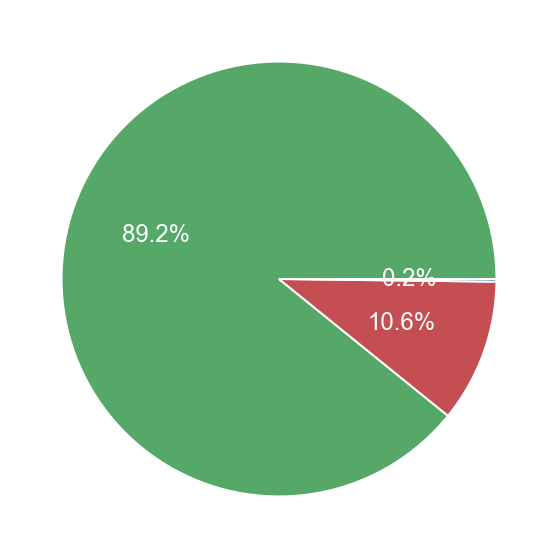

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Skilled Up

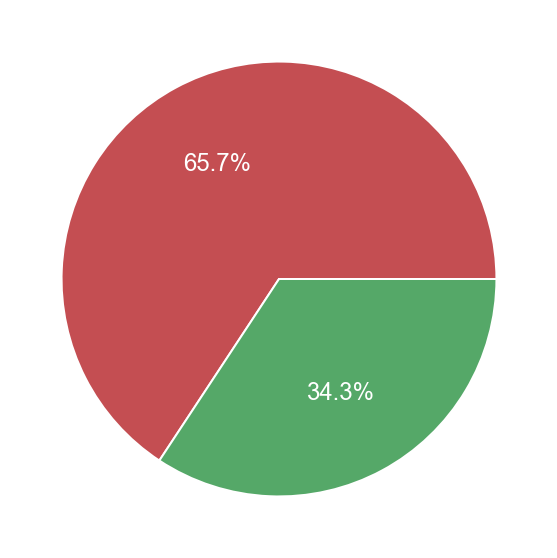

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Runes 

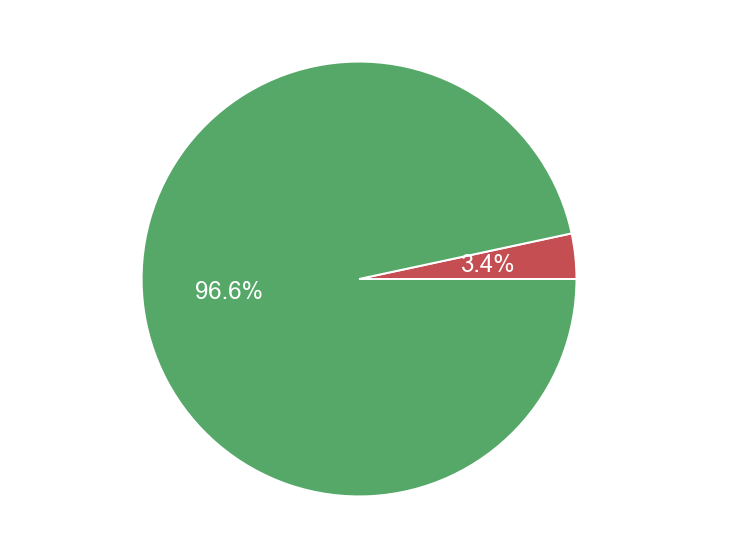

In [4]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without Runes': df_full.shape[0] - df.shape[0],
    'With Runes': df.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Build Type

<Figure size 720x720 with 0 Axes>

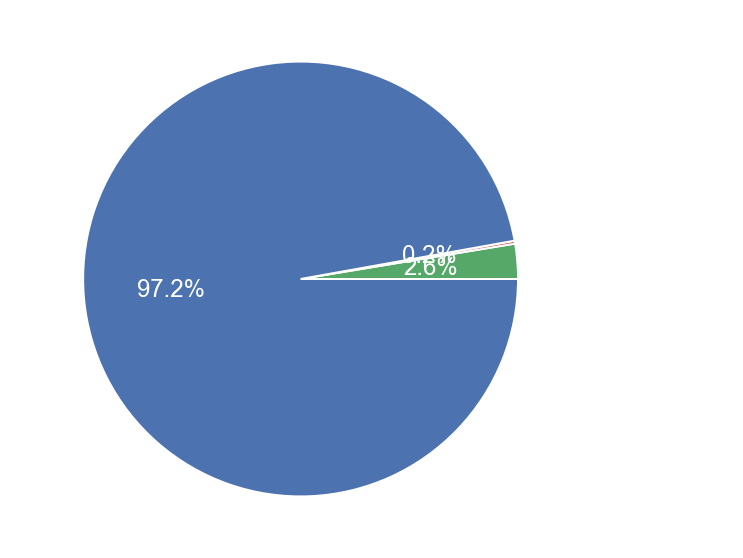

In [5]:
fig = plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10, 10))
dmg_dealer_df = df_stars6[(df_stars6["Crit Rate"] >= 100) & (df_stars6["Crit Dmg"] >= 150)] # shows mons with 100%+ crit rate & 150%+ crit damage
pseudo_dmg_dealer_df = df_stars6[(df_stars6["Attack"] > BASE_STATS['ATTACK'] * 2) & (df_stars6["Crit Rate"] >= 100) & (df_stars6["Crit Dmg"] < 150)]
pie_dmg_or_tanky = {
    'Damage Dealer \n[100% crit rate,\n 150% + crit dmg]': dmg_dealer_df.shape[0],
    'Squishy \n[+100% base attack,\nLow Crit Dmg]': pseudo_dmg_dealer_df.shape[0],
    'Other': df_stars6.shape[0] - pseudo_dmg_dealer_df.shape[0] - dmg_dealer_df.shape[0],
}
plt.pie(pie_dmg_or_tanky.values(), labels=pie_dmg_or_tanky.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_is_tanky.png", transparent=True, bbox_inches = "tight")
plt.show()

# Crit Rate

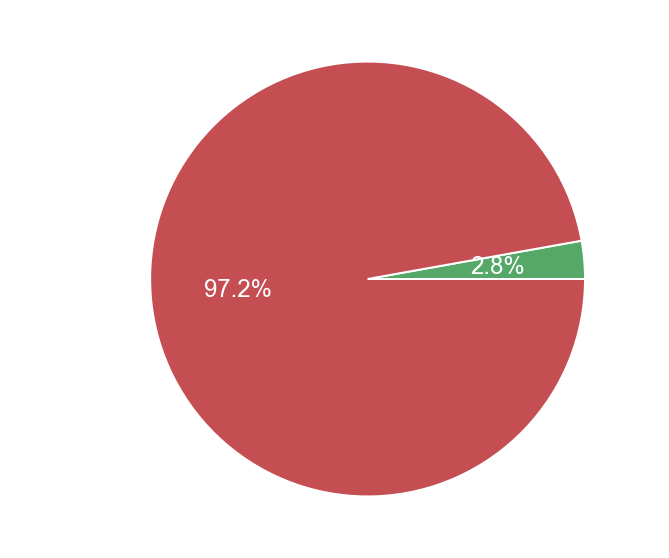

In [6]:
fig = plt.figure(figsize=(10, 10))
df_crit_rate_yes = df_stars6[df_stars6["Crit Rate"] >= 100]
df_crit_rate = {
    '100%': df_crit_rate_yes.shape[0],
    'Under 100%': df_stars6.shape[0] - df_crit_rate_yes.shape[0],
}
plt.pie(df_crit_rate.values(), labels=df_crit_rate.keys(), autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_crit_rate.png", transparent=True, bbox_inches = "tight")
plt.show()

# Transmog

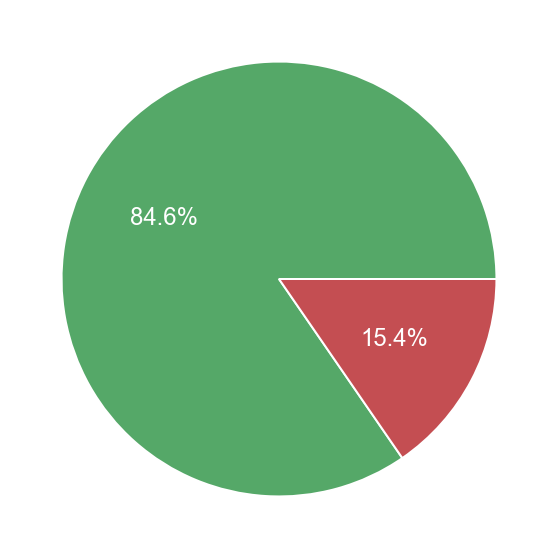

In [24]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Transmogrified"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_transmog.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

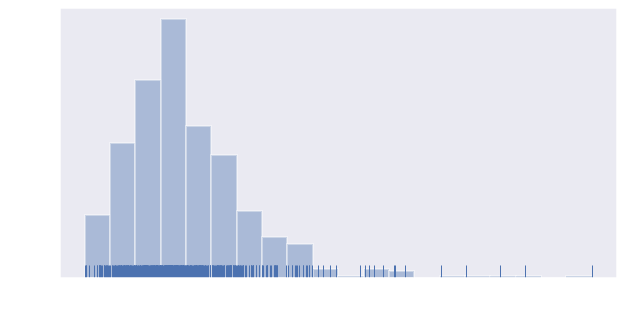

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# Total Attack Distribution

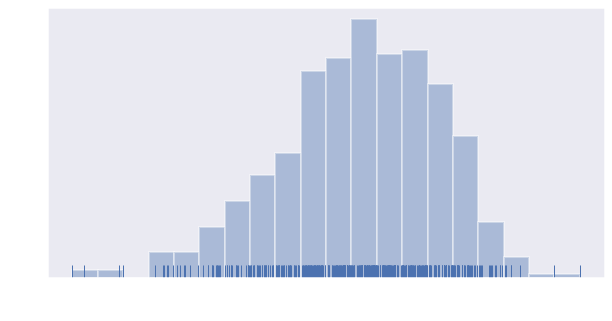

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

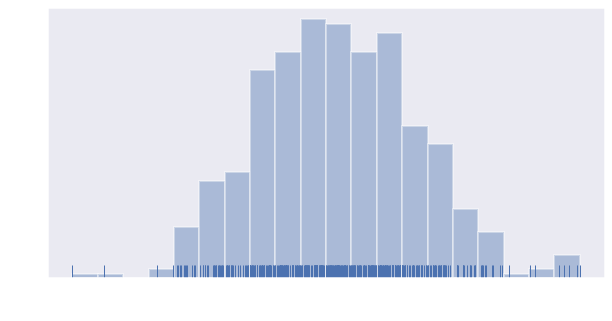

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Sets

Blade + Violent          112
Violent                   56
Revenge + Violent         31
Blade + Fatal             27
Focus + Violent           26
Shield + Violent          24
Blade + Rage              18
Violent + Will            14
Energy + Violent          12
Fatal                     11
Blade + Swift             10
Nemesis + Violent          8
Broken                     6
Blade                      6
Endure + Violent           6
Fight + Violent            5
Swift                      5
Focus + Rage               5
Fatal + Focus              5
Rage                       4
Blade + Energy             3
Blade + Fight + Fight      3
Fatal + Revenge            3
Guard + Violent            3
Energy + Fatal             2
Fatal + Shield             2
Energy                     2
Destroy + Violent          2
Rage + Revenge             2
Blade + Guard              2
Fatal + Fight              2
Guard + Swift              2
Name: Sets, dtype: int64


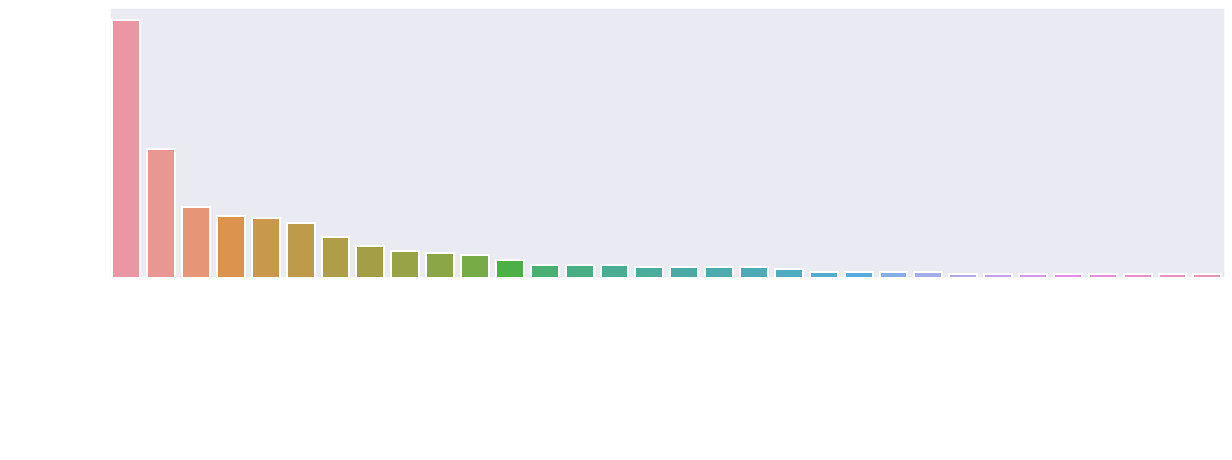

In [11]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 1]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# 4-Rune Sets

dict_items([('Violent', 300), ('Fatal', 52), ('Rage', 34), ('Swift', 20), ('Vampire', 3), ('Despair', 2)])


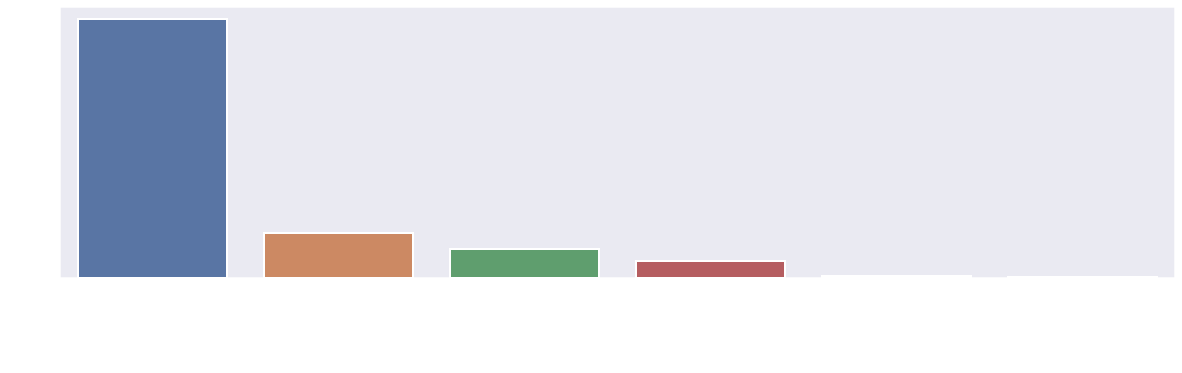

In [38]:
sets_4 = ['Violent', 'Swift', 'Rage', 'Fatal', 'Despair', 'Vampire']
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
set_sum = dict()
for set_4 in sets_4:
    indexes = [val for val in counts.index if set_4 in val]
    set_count = counts.loc[indexes]
    set_sum[set_4] = set_count.sum()
set_sum = {k: v for k, v in sorted(set_sum.items(), key=lambda item: item[1], reverse=True)}
x, y = list(set_sum.keys()), list(set_sum.values())
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_4sets.png", transparent=True, bbox_inches = "tight")

# Eff. HP Distribution for most common set

Blade + Violent


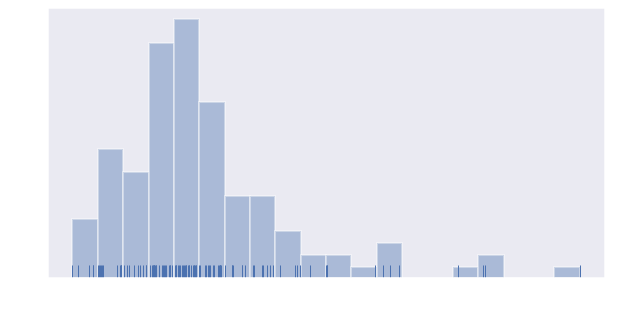

In [12]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_common_set_effhp.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

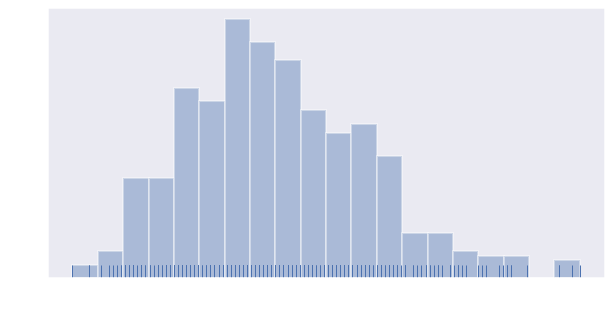

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Eff. HP

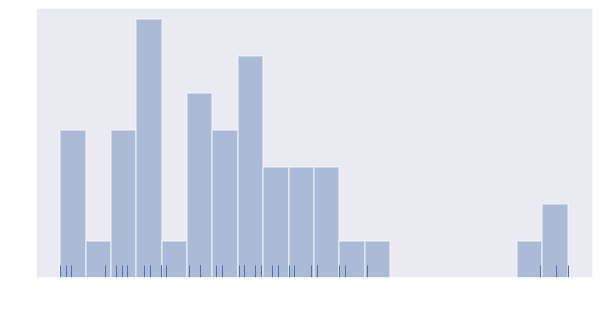

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

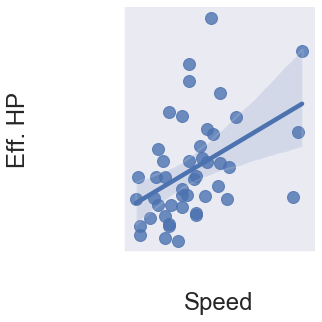

In [15]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Attack - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

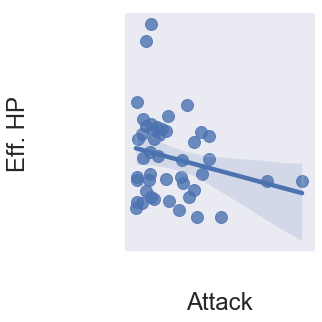

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Attack", y="Eff. HP", data=df_stars6.sort_values(['Attack'], ascending=False).head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_atk_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [17]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B
ID,,,,,,,,,,,
1,25642,2884,1323,226,79,76,119,242,107,131992,60060


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Locked', 'Rune #1', 'Rune #3', 'Rune #5', 'Level', 'Stars', 'Transmogrified', 'Skilled Up'], axis=1).reset_index(drop=True).rename(columns={'Resistance': 'Res', 'Accuracy': 'Acc'}).sort_values(['Avg Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>Crit Rate</th>
      <th>Crit Dmg</th>
      <th>Avg Eff</th>
      <th>Eff. HP</th>
      <th>Eff. HP D-B</th>
      <th>Sets</th>
      <th>Rune #2</th>
      <th>Rune #4</th>
      <th>Rune #6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>21973</td>
      <td>1962</td>
      <td>1240</td>
      <td>226</td>
      <td>15</td>
      <td>7</td>
      <td>54</td>
      <td>130</td>
      <td>106.58</td>
      <td>120412</td>
      <td>53658</td>
      <td>Shield + Violent</td>
      <td>SPD</td>
      <td>CDmg%</td>
      <td>ATK%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>21172</td>
      <td>2399</td>
      <td>1240</td>
      <td>164</td>
      <td>34</td>
      <td>25</td>
      <td>70</td>
      <td>147</td>
      <td>106

# Most common Builds

   Rune #2 Rune #4 Rune #6  Count
2     ATK%   CDmg%    ATK%    306
14     SPD   CDmg%    ATK%    110
0     ATK%    ATK%    ATK%     14
9      SPD    ATK%    ATK%     10
4     ATK%  CRate%    ATK%      3
8      HP%   CDmg%    ATK%      3
11     SPD    ATK%     HP%      2
17     SPD  CRate%    ATK%      2


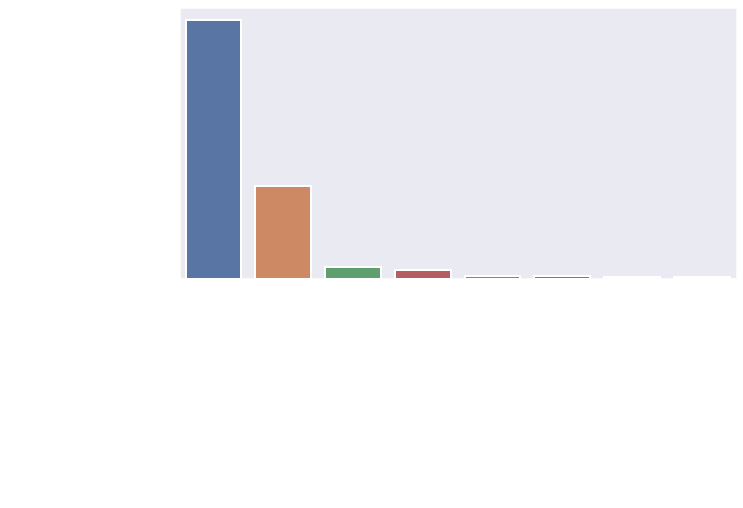

In [19]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

  Rune #2 Rune #4 Rune #6  Count
1    ATK%   CDmg%    ATK%     71
8     SPD   CDmg%    ATK%     30


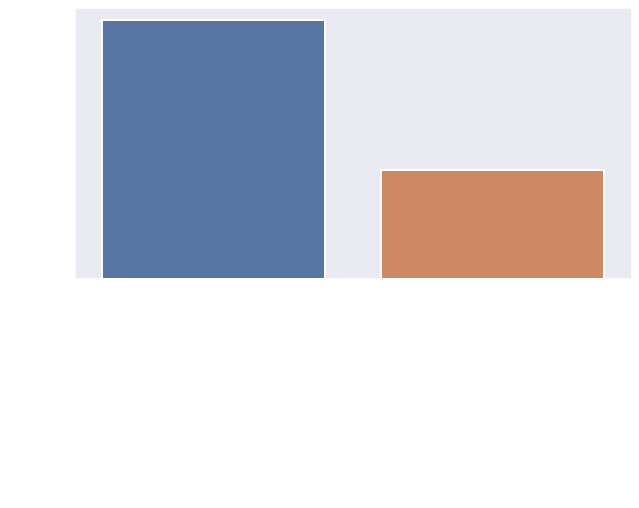

In [20]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 2].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

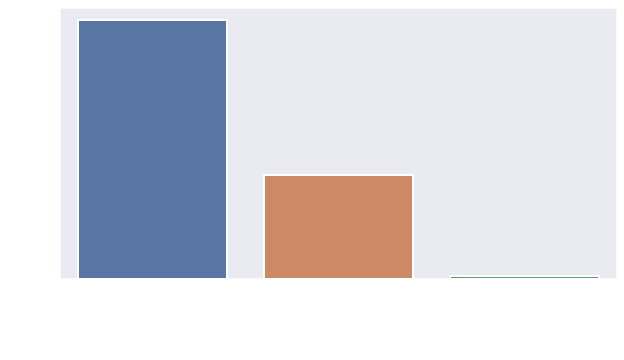

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

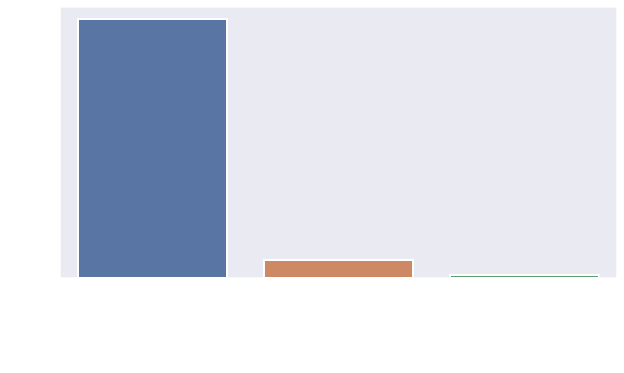

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

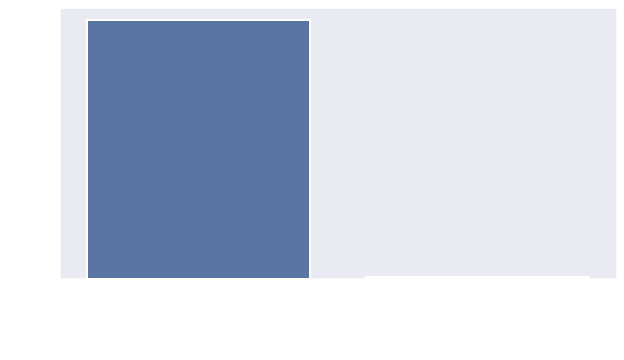

In [23]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")